# Exercise 1: Sampling

In [3]:
from random import uniform
import math
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [4]:
def compare_random_functions(custom_random_function, mu = 5.0, sigma = 2.0, number_of_samples = 1e6):
    
    number_of_samples = int(number_of_samples)
    tic = timeit.default_timer()
    np_samples = np.random.normal(loc=mu, scale = sigma, size = number_of_samples)
    toc = timeit.default_timer()
    numpy_time =  (toc - tic) / number_of_samples * 1e6
    
    tic = timeit.default_timer()
    function_samples = [custom_random_function(mu, sigma) for _ in range(number_of_samples)]
    toc = timeit.default_timer()
    custom_time =  (toc - tic) / number_of_samples * 1e6
    
    nbins = 100
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.hist(np_samples, bins= nbins)
    plt.title(f'numpy random function ({numpy_time})')
    plt.subplot(122)
    plt.hist(function_samples, bins= nbins)
    plt.title(f'{custom_random_function.__name__} random function ({custom_time})')
    plt.show()

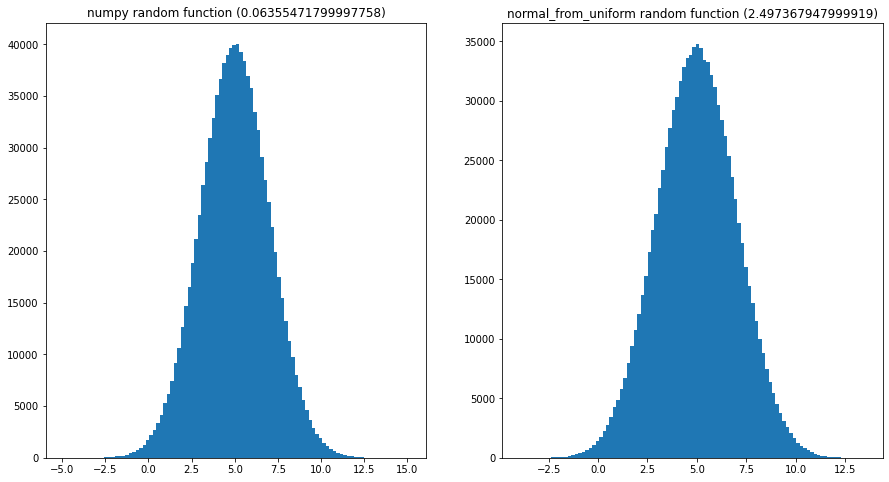

In [5]:
def normal_from_uniform(mu, sigma):
    return (0.5 * sum([uniform(-sigma, sigma) for _ in range(12)])) + mu

compare_random_functions(normal_from_uniform)

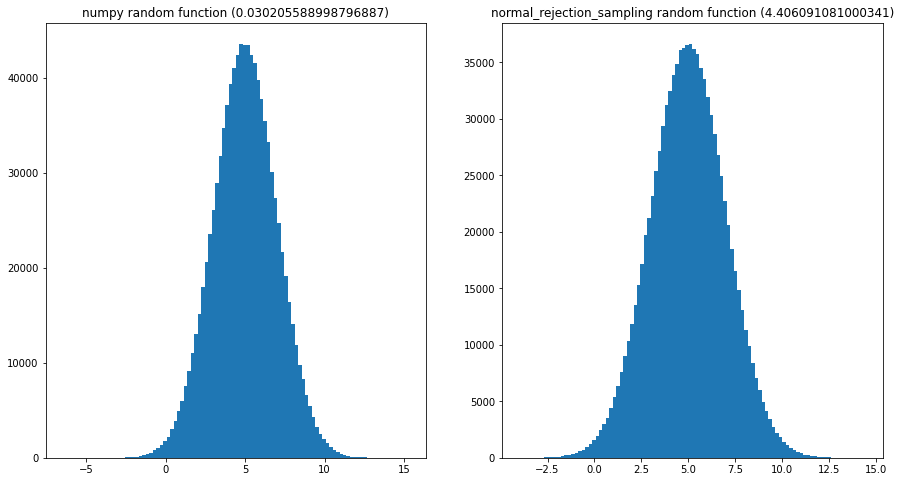

In [4]:
def normal_rejection_sampling(mu, sigma):
    def normal_equation(x):
        return math.exp(-0.5* ((x-mu)**2)/(sigma**2) )  / (sigma * math.sqrt(2.0 * math.pi))
    
    while True:
        randx = uniform(mu - 5*sigma , mu + 5*sigma)
        randy = uniform(0, normal_equation(mu))
        if randy <= normal_equation(randx):
            return randx

compare_random_functions(normal_rejection_sampling)

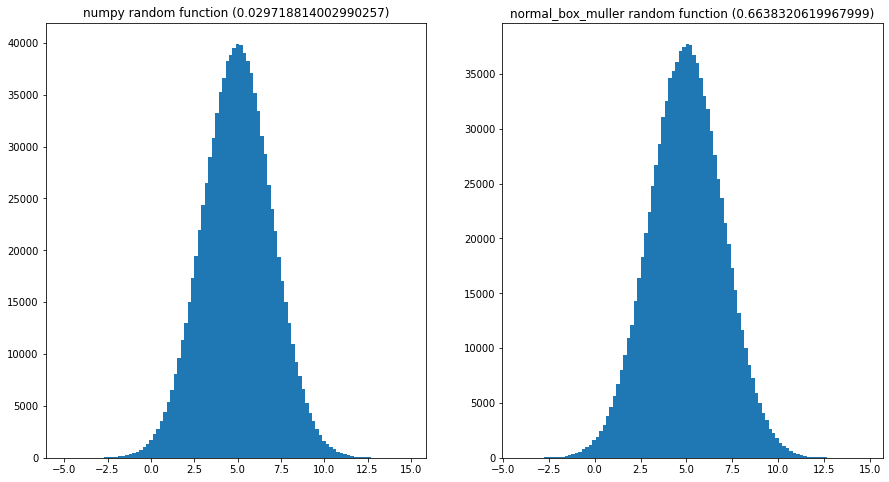

In [5]:
def normal_box_muller(mu, sigma):
    u1 = uniform(0.0,1.0)
    u2 = uniform(0.0,1.0)
    return math.cos(2.0*math.pi* u1)*math.sqrt(-2.0 * math.log(u2)) * sigma + mu

compare_random_functions(normal_box_muller)

# Exercise 2: Odometry-based Motion Model

## a)

In [27]:
def noisy_control(control, alpha):
    c0 = control[0] + normal_from_uniform(mu = 0, 
                                          sigma=alpha[0]*abs(control[0]) + alpha[1]*abs(control[2]))
    c1 = control[1] + normal_from_uniform(mu = 0, 
                                          sigma=alpha[0]*abs(control[1]) + alpha[1]*abs(control[2]))
    c2 = control[2] + normal_from_uniform(mu = 0, 
                                          sigma=alpha[2]*abs(control[2]) + 
                                          alpha[3]*(abs(control[0]) + 
                                                    abs(control[1])) )
    return np.array([c0, c1, c2])

def odometry_based_motion_model(state, control, alpha):
    r1, r2, dt = noisy_control(control, alpha)
    x,y,theta = state
    x_p = x + dt * math.cos(theta + r1)
    y_p = y + dt * math.sin(theta + r1)
    theta_t = theta + r1 + r2
    return np.array([x_p, y_p, theta_t], dtype = np.float)

## b)

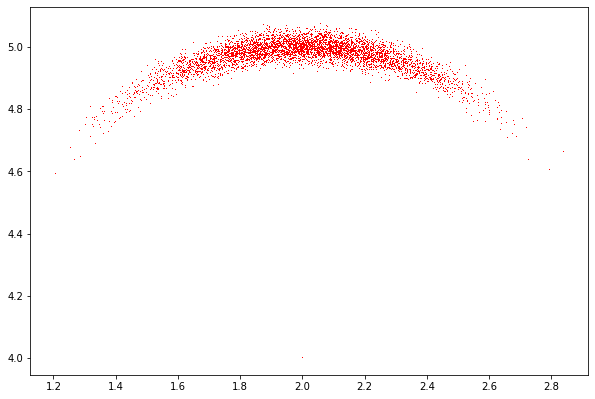

In [28]:
x = np.array([2.0, 4.0, 0.0])
u = np.array([np.pi/2, 0.0, 1.0])
a = np.array([0.1, 0.1, 0.01, 0.01])

n = 5000
res = [x[:2]]
for _ in range(5000):
    xx, xy , _ = odometry_based_motion_model(x,u,a)
    res.append([xx,xy])
res = np.array(res)
plt.figure(figsize=[10,10])
plt.axes().set_aspect('equal')
plt.plot(res[:,0],res[:,1],"r,")
plt.show()